## 데이터 로드

In [ ]:
!git clone https://github.com/Moradnejad/StackOverflow-Questions-Quality-Dataset

Cloning into 'StackOverflow-Questions-Quality-Dataset'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 31 (delta 0), reused 0 (delta 0), pack-reused 28
Unpacking objects: 100% (31/31), done.


In [ ]:
!unzip /content/StackOverflow-Questions-Quality-Dataset/Dataset.zip

Archive:  /content/StackOverflow-Questions-Quality-Dataset/Dataset.zip
  inflating: train.csv               
  inflating: valid.csv               


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import random
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
train = pd.read_csv("train.csv")
valid = pd.read_csv("valid.csv")

data = pd.concat([train, valid])

data.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


## 데이터 탐색

In [ ]:
data.info() #총 60000개 row와 6개의 feature로 이루어진 데이터

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            60000 non-null  int64 
 1   Title         60000 non-null  object
 2   Body          60000 non-null  object
 3   Tags          60000 non-null  object
 4   CreationDate  60000 non-null  object
 5   Y             60000 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.2+ MB


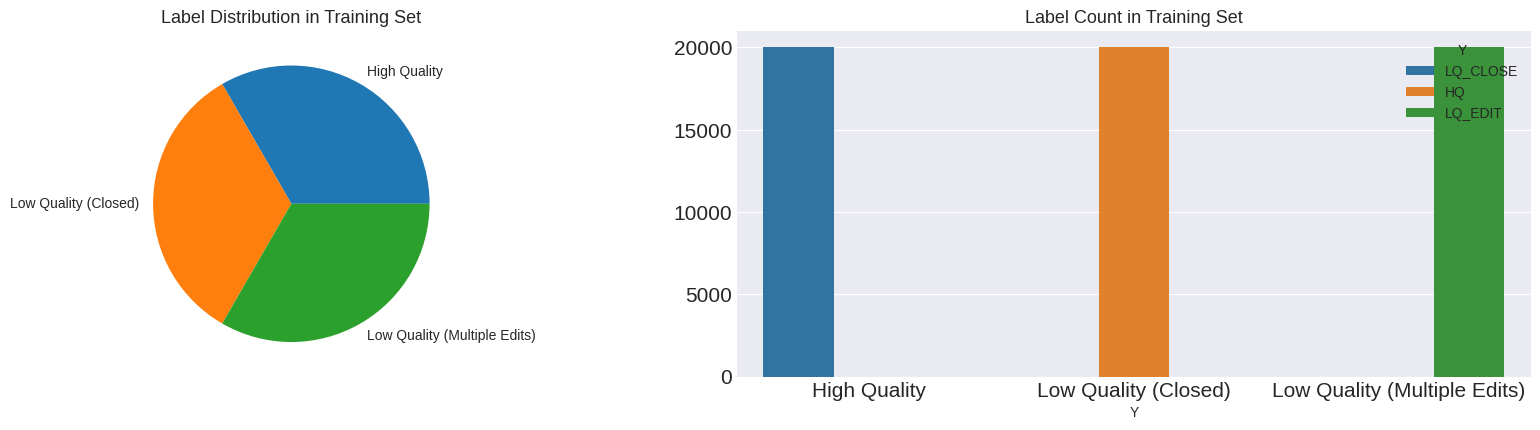

In [ ]:
plt.rcParams['figure.figsize'] = [24, 12]
plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(ncols = 2, figsize = (17, 4), dpi = 100)
plt.tight_layout()

data.groupby('Y').count()['Id'].plot(kind = 'pie', ax = axes[0], labels = ['High Quality', 'Low Quality (Closed)', 'Low Quality (Multiple Edits)'])
sns.countplot(x = data['Y'], hue = data['Y'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['High Quality', 'Low Quality (Closed)', 'Low Quality (Multiple Edits)'])
axes[0].tick_params(axis = 'x', labelsize = 15)
axes[0].tick_params(axis = 'y', labelsize = 15)
axes[1].tick_params(axis = 'x', labelsize = 15)
axes[1].tick_params(axis = 'y', labelsize = 15)

axes[0].set_title('Label Distribution in Training Set', fontsize = 13)
axes[1].set_title('Label Count in Training Set', fontsize = 13)

plt.show()

In [ ]:
data['Tags'] = data['Tags'].str.replace('>',',')
data['Tags'] = data['Tags'].str.replace('<','')

data.head() # <, > 같은 문자들 제거

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,"java,repeat,",2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,"java,optional,",2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,"javascript,image,overlay,react-native,opacity,",2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...","swift,operators,whitespace,ternary-operator,op...",2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,"android,material-design,floating-action-button,",2016-01-01 05:21:48,HQ


In [ ]:
tags = data[['Tags']]
tags = pd.concat([tags[['Tags']], tags['Tags'].str.split(',', expand = True)], axis = 1)
tags = tags.drop('Tags', axis = 1)
tags

,0,1,2,3,4,5,6
0,java,repeat,,None,None,None,None
1,java,optional,,None,None,None,None
2,javascript,image,overlay,react-native,opacity,,None
3,swift,operators,whitespace,ternary-operator,optional,,None
4,android,material-design,floating-action-button,,None,None,None
...,...,...,...,...,...,...,...
14995,html,css,flexbox,,None,None,None
14996,c++,,None,None,None,None,None
14997,django,django-views,django-templates,,None,None,None
14998,javascript,php,html,,None,None,None


In [ ]:
def get_tags_counts(col):
    
    if(not col):
        return 0
    
    tags_count = len(col.split(','))
    
    return tags_count


def get_tech_keys(tag):
    
    if(not tag):
        return tag
    
    tag = tag.replace('><', ',')
    
    tag = tag.replace('<', '')
    
    tag = tag.replace('>', '')
    
    return tag

In [ ]:
data['TechKeys'] = data['Tags'].apply(get_tech_keys)

In [ ]:
train_tech_keys = data[['TechKeys']]

In [ ]:
tech_key_list   = []
tech_key_values = None
index_counter = 0
tech_key_index_list = []
for (columnName, columnData) in train_tech_keys.iteritems():
    tech_key_values = columnData.values
    
for item in tech_key_values:
    item_parts = item.split(',')
    
    for item_ in item_parts:
        
        tech_key_index_list.append(index_counter)
        tech_key_list.append(item_)
        
        index_counter += 1
    
# tech_key_list

In [ ]:
data_1 = {'Id' : tech_key_index_list, 'tech_key' : tech_key_list} 
  
# Create DataFrame 
train_tech_key_new = pd.DataFrame(data_1) 

In [ ]:
data['TagsCount'] = data['TechKeys'].apply(get_tags_counts)

In [ ]:
train_tech_key_new.tech_key.value_counts().nlargest(10)

              60000
javascript     7106
python         6800
java           6242
android        4838
php            4161
c#             4154
html           3376
c++            3003
css            2104
Name: tech_key, dtype: int64

In [ ]:
text = " ".join(tags[0])
text

'java java javascript swift android c javascript jquery c# vb6 linux android ios c++ ios haskell arrays amazon-web-services c++ bluebird powershell c# c# vbscript swift c# android scala java kotlin c++ java nginx android c elixir linux mysql ios mongodb-java java ios javascript android-studio c++ powershell python java php c++ java matlab python android c# android linux linux playframework jekyll c jquery r java node.js elixir python html mongodb c python javascript java codenameone angularjs hadoop linux android javascript php r android java c++ html asp.net image typescript django android python linux node.js python javascript javascript code-generation android javascript python css java javascript facebook javascript ios angularjs javascript android debugging ffmpeg c# ios android postgresql typescript c# angular javascript python php android php javascript sublimetext2 spring android python haskell ios ssl html php php titan javascript r docker date java c ios javascript java wordp

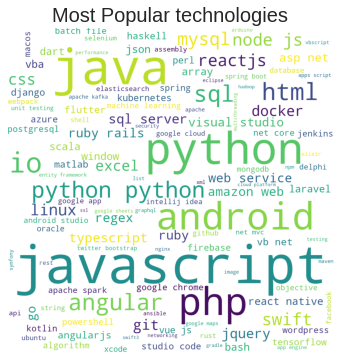

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular technologies',fontsize = 20)
plt.show()

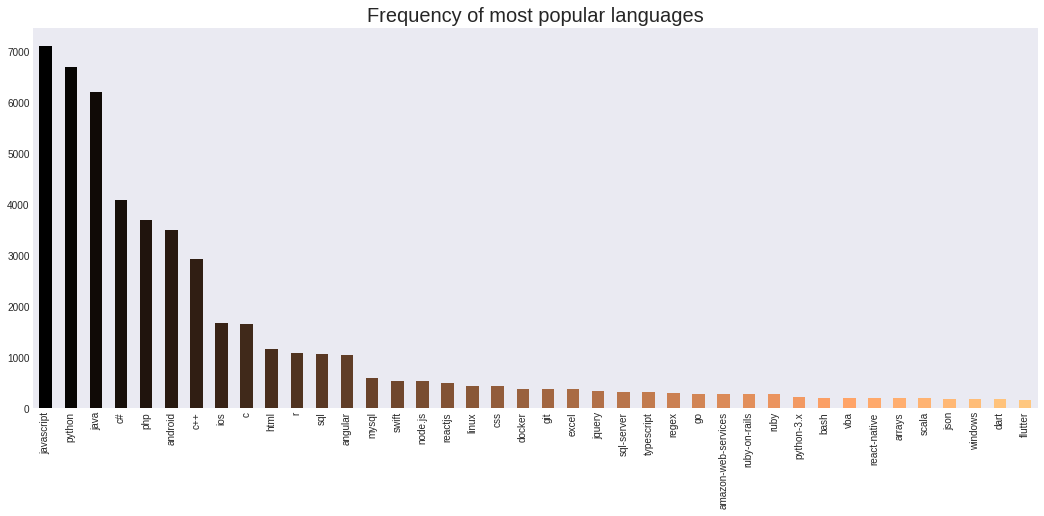

In [ ]:
# 앞서 wordcloud로 시각화 한 내용을 plot으로 시각화
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
tags[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of most popular languages', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
import datetime

def get_week(col):
    
    return col.strftime("%V")

In [ ]:
data['CreationDatetime'] = pd.to_datetime(data['CreationDate']) 
data['CreationMonth'] = data['CreationDatetime'].dt.month.astype(int)
data['CreationYear'] = data['CreationDatetime'].dt.year.astype(int)

In [ ]:
def show_donut_plot(col):
    
    rating_data = data.groupby(col)[['Id']].count().head(10)
    plt.figure(figsize = (12, 8))
    plt.pie(rating_data[['Id']], autopct = '%1.0f%%', startangle = 140, pctdistance = 1.1, shadow = True)

    # create a center circle for more aesthetics to make it better
    gap = plt.Circle((0, 0), 0.5, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(gap)
    
    plt.axis('equal')
    
    cols = []
    for index, row in rating_data.iterrows():
        cols.append(index)
    plt.legend(cols)
    
    plt.title('Donut Plot: SOF Questions by ' +str(col), loc='center')
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


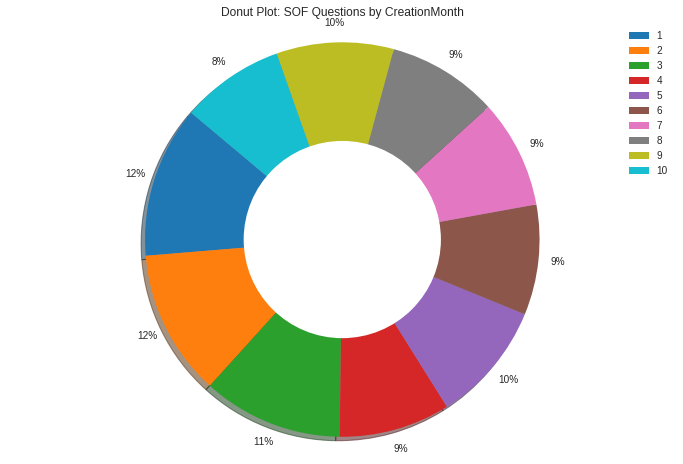

In [ ]:
show_donut_plot('CreationMonth')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


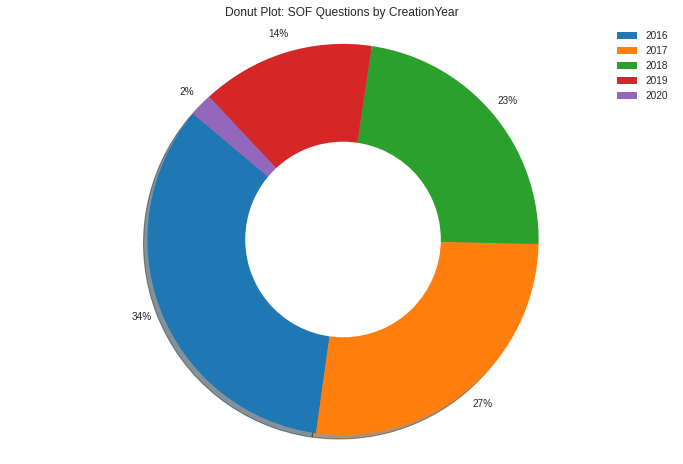

In [ ]:
show_donut_plot('CreationYear')

In [ ]:
# remove code, remove stopwords, remove characters less than 3 

import re

code_start = '<code>'
code_end   = '</code>'

def get_codes(content):
    
    if('<code>' not in content):
        return None
    
    code_list = []
    
    loop_counter = 0
    while(code_start in content):

        code_start_index = content.index(code_start)
        if(code_end not in content):
            code_end_index = len(content)
        else:
            code_end_index = content.index(code_end)

        substring_1 = content[code_start_index : (code_end_index + len(code_end) )]
 
        code_list.append(substring_1)
        
        content = content.replace(substring_1, '')
        
        loop_counter += 1

    
    return ' '.join(code_list)

def  clean_text(content):
    
    content = content.lower()
    
    content = re.sub('<.*?>+', '', content)
    
    content = re.sub(r"(@[A-Za-z0-9]+)|^rt|http.+?", "", content)
    content = re.sub(r"(\w+:\/\/\S+)", "", content)
    content = re.sub(r"([^0-9A-Za-z \t])", " ", content)
    content = re.sub(r"^rt|http.+?", "", content)
    content = re.sub(" +", " ", content)

    # remove numbers
    content = re.sub(r"\d+", "", content)
    
    return content

# Clean the data
def clean_text_simple(text):
    text = text.lower()
    text = re.sub(r'<p>','', text)
    text = re.sub(r'</p>','', text)
    text = re.sub(r'[^(a-zA-Z)\s]','', text)
    return text

def get_non_codes(content):
    
    loop_counter = 0
    while(code_start in content):

        code_start_index = content.index(code_start)
        if(code_end not in content):
            code_end_index = len(content)
        else:
            code_end_index = content.index(code_end)

        substring_1 = content[code_start_index : (code_end_index + len(code_end) )]

        content = content.replace(substring_1, ' ')
        
        loop_counter += 1
        
    content = clean_text_simple(content)

    return content

In [ ]:
data['Body_code'] = data['Body'].apply(get_codes)
data['Body_content'] = data['Body'].apply(get_non_codes)
data['Title_content'] = data['Title'].apply(get_non_codes)

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stopwords1 = stopwords.words('english')

data['content_words'] = data['Body_content'].apply(lambda x:str(x).split())
data['title_words'] = data['Title_content'].apply(lambda x:str(x).split())

In [ ]:
def remove_short_words(content):

    new_content_list = []
    for item in content:
        
        if(len(item) > 2):
            new_content_list.append(item)
    
    return new_content_list

In [ ]:
data['content_words'] = data['content_words'].apply(remove_short_words)
data['title_words'] = data['title_words'].apply(remove_short_words)

In [ ]:
from collections import Counter

words_collection = Counter([item for sublist in data['content_words'] for item in sublist if not item in stopwords1])
freq_word_train = pd.DataFrame(words_collection.most_common(30))
freq_word_train.columns = ['frequently_used_word','count']

freq_word_train.style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,pre,82111
1,code,23527
2,like,19276
3,want,19105
4,using,18547
5,get,14907
6,error,14774
7,new,14047
8,use,13760
9,file,13153


In [ ]:
import plotly.express as px

fig = px.scatter(freq_word_train, x="frequently_used_word", y="count", color="count", title = 'Frequently used words - Scatter plot')
fig.show()

In [ ]:
words_collection = Counter([item for sublist in data['title_words'] for item in sublist if not item in stopwords1])
freq_word_train = pd.DataFrame(words_collection.most_common(30))
freq_word_train.columns = ['frequently_used_word','count']

freq_word_train.style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,using,4082
1,python,3168
2,error,2995
3,string,2552
4,array,2533
5,file,2440
6,get,2433
7,android,2373
8,code,2342
9,java,2204


In [ ]:
import plotly.express as px

fig = px.scatter(freq_word_train, x="frequently_used_word", y="count", color="count", title = 'Frequently used words - Scatter plot')
fig.show()

In [ ]:
# 코드를 포함하고 있는가?

def code_available(content):
    
    if('<code>' in content):
        return True
    
    return False

In [ ]:
data['code_available'] = data['Body'].apply(code_available)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



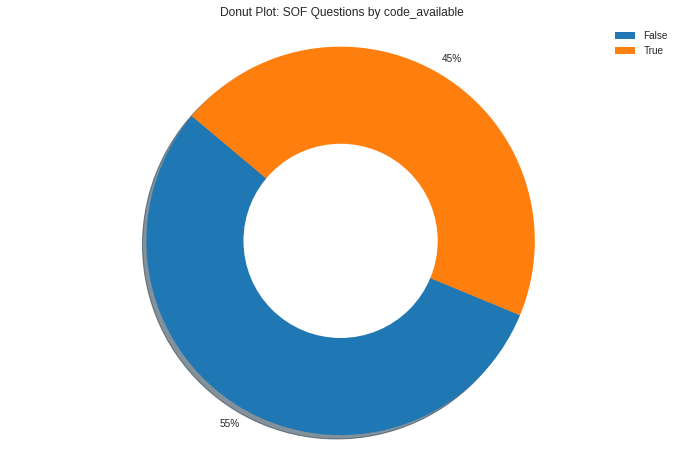

In [ ]:
show_donut_plot('code_available')

## 데이터 전처리

In [ ]:
train = pd.read_csv("train.csv")
valid = pd.read_csv("valid.csv")

data = pd.concat([train, valid])

In [ ]:
data = data.drop(['Id', 'Tags', 'CreationDate'], axis=1)
data['Y'] = data['Y'].map({'LQ_CLOSE':0, 'LQ_EDIT': 1, 'HQ':2}) # Y 값을 정수형태로 인코딩
data.head()

,Title,Body,Y
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,0
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,2
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,2
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",2
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,2


In [ ]:
# title과 body(text) 부분 통합 - classification에 사용할 수 있도록
 
data['text'] = data['Title'] + ' ' + data['Body']
data = data.drop(['Title', 'Body'], axis=1)

In [ ]:
data.head()

,Y,text
0,0,Java: Repeat Task Every Random Seconds <p>I'm ...
1,2,Why are Java Optionals immutable? <p>I'd like ...
2,2,Text Overlay Image with Darkened Opacity React...
3,2,Why ternary operator in swift is so picky? <p>...
4,2,hide/show fab with scale animation <p>I'm usin...


In [ ]:
# 질문에 code가 포함되어 있으므로 code 부분을 제거

import re

code_start = '<code>'
code_end   = '</code>'

def get_codes(content):
    
    if('<code>' not in content):
        return None
    
    code_list = []
    
    loop_counter = 0
    while(code_start in content):

        code_start_index = content.index(code_start)
        if(code_end not in content):
            code_end_index = len(content)
        else:
            code_end_index = content.index(code_end)

        substring_1 = content[code_start_index : (code_end_index + len(code_end) )]
 
        code_list.append(substring_1)
        
        content = content.replace(substring_1, '')
        
        loop_counter += 1

    
    return ' '.join(code_list)

In [ ]:
# 데이터 깔끔하게 정리 (특수문자 제거, 소문자 변환...등)

def  clean_text(content):
    
    content = content.lower()
    
    content = re.sub('<.*?>+', '', content)
    
    content = re.sub(r"(@[A-Za-z0-9]+)|^rt|http.+?", "", content)
    content = re.sub(r"(\w+:\/\/\S+)", "", content)
    content = re.sub(r"([^0-9A-Za-z \t])", " ", content)
    content = re.sub(r"^rt|http.+?", "", content)
    content = re.sub(" +", " ", content)

    # remove numbers
    content = re.sub(r"\d+", "", content)
    
    return content

# Clean the data
def clean_text_simple(text):
    text = text.lower()
    text = re.sub(r'<p>','', text)
    text = re.sub(r'</p>','', text)
    text = re.sub(r'[^(a-zA-Z)\s]','', text)


    return text

def get_non_codes(content):
    
    loop_counter = 0
    while(code_start in content):

        code_start_index = content.index(code_start)
        if(code_end not in content):
            code_end_index = len(content)
        else:
            code_end_index = content.index(code_end)

        substring_1 = content[code_start_index : (code_end_index + len(code_end) )]

        content = content.replace(substring_1, ' ')
        
        loop_counter += 1
        
    content = clean_text_simple(content)
    content = clean_text(content)

    return content

In [ ]:
data['code'] = data['text'].apply(get_codes)
data['content'] = data['text'].apply(get_non_codes)

In [ ]:
data = data.drop(['text', 'code'], axis=1)

In [ ]:
data.head()

,Y,content
0,0,java repeat task every random seconds im alrea...
1,2,why are java optionals immutable id like to un...
2,2,text overlay image with darkened opacity react...
3,2,why ternary operator in swift is so picky the ...
4,2,hideshow fab with scale animation im using cus...


In [ ]:
data['content'] = data['content'].apply(lambda x:str(x).split())

In [ ]:
data.head()

,Y,content
0,0,"[java, repeat, task, every, random, seconds, i..."
1,2,"[why, are, java, optionals, immutable, id, lik..."
2,2,"[text, overlay, image, with, darkened, opacity..."
3,2,"[why, ternary, operator, in, swift, is, so, pi..."
4,2,"[hideshow, fab, with, scale, animation, im, us..."


In [ ]:
def remove_short_words(content):

    new_content_list = []
    for item in content:
        
        if(len(item) > 2):
            new_content_list.append(item)
    
    return new_content_list

In [ ]:
data['content'] = data['content'].apply(remove_short_words)

In [ ]:
# 불용어 제거
from collections import Counter
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들

english_stops = stopwords.words('english') #영어 불용어를 가져옴

def remove_stopwords(content):

    new_content_list = []
    for item in content:
        if not item in english_stops:
            new_content_list.append(item)
    
    return new_content_list

data['content'] = data['content'].apply(remove_stopwords)

In [ ]:
data.head()

,Y,content
0,0,"[java, repeat, task, every, random, seconds, a..."
1,2,"[java, optionals, immutable, like, understand,..."
2,2,"[text, overlay, image, darkened, opacity, reac..."
3,2,"[ternary, operator, swift, picky, question, si..."
4,2,"[hideshow, fab, scale, animation, using, custo..."


In [ ]:
data_list = data['content'][0]

In [ ]:
data_string = ' '.join([str(item) for item in data_list])

In [ ]:
data_string

"['java', 'repeat', 'task', 'every', 'random', 'seconds', 'already', 'familiar', 'repeating', 'tasks', 'every', 'seconds', 'using', 'javautiltimer', 'javautiltimertask', 'lets', 'say', 'want', 'print', 'hello', 'world', 'console', 'every', 'random', 'seconds', 'unfortunately', 'bit', 'rush', 'dont', 'code', 'show', 'far', 'help', 'would', 'apriciated'] ['get', 'child', 'records', 'different', 'tables', 'based', 'given', 'parent', 'sql', 'server', 'different', 'tables', 'like', 'select', 'system', 'select', 'set', 'select', 'item', 'select', 'versions', 'system', 'noof', 'sets', 'foe', 'set', 'qill', 'items', 'item', 'noof', 'versions', 'system', 'set', 'set', 'items', 'item', 'versions', 'give', 'systemid', 'retrieve', 'records', 'set', 'items', 'set', 'versions', 'items', 'single', 'storedprocedure']"

In [ ]:
def listtostring(content):
    for item in content:
      data_string = ' '.join([str(item) for item in content])
    return data_string

In [ ]:
data['content'] = data['content'].apply(listtostring)

In [ ]:
data

,Y,content
0,0,java repeat task every random seconds already ...
1,2,java optionals immutable like understand java ...
2,2,text overlay image darkened opacity react nati...
3,2,ternary operator swift picky question simple c...
4,2,hideshow fab scale animation using custom floa...
...,...,...
14995,0,align two flex boxes follow menu like divright...
14996,0,correct way multiply integer double try multip...
14997,1,django showing error try open new page hyperli...
14998,0,php getting content php page controller inside...


## 모델링

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# train, test 데이터 생성

df = data
train = df['content']
test = df['Y']

In [ ]:
# TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
train_Tfid = vectorizer.fit_transform(train)

In [ ]:
# train, test data split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_Tfid, test, test_size=0.2, random_state=1, stratify=test)

In [ ]:
content = data['content']
content

0        java repeat task every random seconds already ...
1        java optionals immutable like understand java ...
2        text overlay image darkened opacity react nati...
3        ternary operator swift picky question simple c...
4        hideshow fab scale animation using custom floa...
                               ...                        
14995    align two flex boxes follow menu like divright...
14996    correct way multiply integer double try multip...
14997    django showing error try open new page hyperli...
14998    php getting content php page controller inside...
14999    cant overloaded functions vary return type rec...
Name: content, Length: 60000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']{3,}")                                                                        # 정규포현식으로 토크나이저를 정의

tokens = [[token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in content]        # tf-idf 시각화를 위한 토큰 정의
word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

word_features = sorted_features[:500]                                                                          # 빈도가 높은 상위 500개의 단어만 추출하여 features를 구성

In [ ]:
cv = CountVectorizer(vocabulary=word_features)                                                                 # 빈도 높은 단어들 fitting

print(cv) 
                    
content_cv = cv.fit_transform(content)

CountVectorizer(vocabulary=['pre', 'code', 'using', 'like', 'want', 'error',
                            'get', 'string', 'file', 'new', 'use', 'int',
                            'function', 'data', 'would', 'help', 'value',
                            'need', 'one', 'class', 'way', 'array', 'trying',
                            'return', 'know', 'public', 'div', 'following',
                            'image', 'please', ...])


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

content_tfidf = transformer.fit_transform(content_cv)
print('#shape of tfidf matrix:', content_tfidf.shape)                                                         

#shape of tfidf matrix: (60000, 500)


In [ ]:
tfidf_df=pd.DataFrame(content_tfidf.toarray(), columns=cv.get_feature_names_out())
tfidf_df

,pre,code,using,like,want,error,get,string,file,new,...,side,stack,spring,condition,full,framework,tables,exist,though,support
0,0.000000,0.096030,0.098240,0.000000,0.100574,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.266607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.142572,0.083950,0.000000,0.089029,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.594124,0.000000,0.000000,0.092750,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.160613,0.166498,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.000000,0.000000,0.000000,0.072954,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.257357,0.000000,0.155027,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.000000,0.000000,0.000000,0.000000,0.046245,0.107735,0.0,0.0,0.059950,0.114516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.146614,0.086331,0.000000,0.000000,0.090416,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
max_val_df=pd.DataFrame(tfidf_df.max(axis=0),columns=['max_val'])
max_val_df

,max_val
pre,1.000000
code,1.000000
using,0.894533
like,0.789731
want,1.000000
...,...
framework,0.878967
tables,0.908288
exist,0.932814
though,0.522957


In [ ]:
max_val_df.sort_values(by=['max_val'],ascending=False)[:50].index  #TF-IDF 값 상위 50개 단어

Index(['pre', 'regex', 'whats', 'make', 'click', 'studio', 'find', 'right',
       'run', 'sql', 'length', 'bar', 'top', 'done', 'group', 'javascript',
       'main', 'possible', 'used', 'around', 'files', 'select', 'blockquote',
       'html', 'char', 'see', 'get', 'looking', 'install', 'array', 'want',
       'exception', 'much', 'know', 'count', 'difference', 'code', 'echo',
       'part', 'object', 'null', 'const', 'true', 'data', 'div', 'title',
       'send', 'struct', 'post', 'convert'],
      dtype='object')

In [ ]:
max_val_df.sort_values(by=['max_val'])[:50].index  #TF-IDF 값 하위 50개 단어

Index(['altenter', 'though', 'herea', 'fine', 'advance', 'seem', 'making',
       'ive', 'heres', 'dont', 'thats', 'tried', 'nothing', 'trying', 'also',
       'sure', 'note', 'however', 'certain', 'gets', 'looks', 'unable', 'able',
       'either', 'made', 'going', 'really', 'first', 'help', 'even',
       'following', 'correctly', 'doesnt', 'try', 'appreciated', 'someone',
       'lets', 'work', 'everything', 'got', 'well', 'achieve', 'far', 'could',
       'inside', 'relnoreferrerimg', 'similar', 'current', 'says', 'might'],
      dtype='object')

#### 1. 의사결정나무 (Decision Tree)

##### Criterion='gini', max_depth=1~10


In [ ]:
from sklearn import tree
tree = DecisionTreeClassifier()
tree = DecisionTreeClassifier(criterion='gini', max_depth=1)
result = tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.544
Decision Tree test set score: 0.541


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=2)
result = tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.592
Decision Tree test set score: 0.589


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
result = tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.604
Decision Tree test set score: 0.601


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4)
result = tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.626
Decision Tree test set score: 0.625


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
result = tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.633
Decision Tree test set score: 0.631


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=6)
result = tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.650
Decision Tree test set score: 0.645


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=7)
result = tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.658
Decision Tree test set score: 0.653


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=8)
result = tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.664
Decision Tree test set score: 0.656


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=9)
result = tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.669
Decision Tree test set score: 0.659


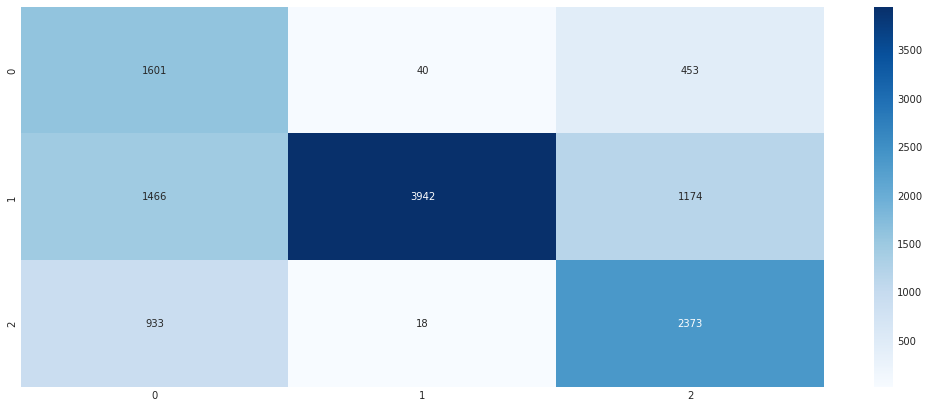

In [ ]:
# 지수 : gini, 최대 노드 깊이 : 9 일때의 confusion matrix

from sklearn.metrics import f1_score
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=9)
tree_model.fit(x_train, y_train)
pred = tree_model.predict(x_test)
pred = np.round(pred)
tree_score = f1_score(pred,y_test,average='macro')

cf_matrix = confusion_matrix(pred,y_test)
ax = sns.heatmap(cf_matrix,cmap='Blues',annot=True,fmt='g')
sns.set(rc = {'figure.figsize':(5,5)})

In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=10)
result = tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.673
Decision Tree test set score: 0.661


##### Criterion='entropy', max_depth=1~10

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.544
Decision Tree test set score: 0.541


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.592
Decision Tree test set score: 0.589


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.593
Decision Tree test set score: 0.590


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.614
Decision Tree test set score: 0.613


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.624
Decision Tree test set score: 0.623


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.634
Decision Tree test set score: 0.632


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.641
Decision Tree test set score: 0.638


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=8)
tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.651
Decision Tree test set score: 0.646


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=9)
tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.659
Decision Tree test set score: 0.652


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
tree.fit(x_train, y_train)

print("Decision Tree train set score: {:.3f}".format(tree.score(x_train, y_train)))
print("Decision Tree test set score: {:.3f}".format(tree.score(x_test, y_test)))

Decision Tree train set score: 0.661
Decision Tree test set score: 0.653


#### 2. KNN 


##### n_neighbors=1~10, p=1

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1, p=1)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 1.000
KNN test set score: 0.507


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=2, p=1)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.641
KNN test set score: 0.492


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, p=1)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.612
KNN test set score: 0.501


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4, p=1)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.587
KNN test set score: 0.503


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, p=1)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.540
KNN test set score: 0.486


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=6, p=1)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.539
KNN test set score: 0.492


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7, p=1)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.513
KNN test set score: 0.480


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=8, p=1)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.578
KNN test set score: 0.457


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9, p=1)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.538
KNN test set score: 0.440


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10, p=1)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.495
KNN test set score: 0.411


##### n_neighbors=1~10, p=2

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1, p=2)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 1.000
KNN test set score: 0.587


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=2, p=2)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.750
KNN test set score: 0.553


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3, p=2)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.779
KNN test set score: 0.619


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4, p=2)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.732
KNN test set score: 0.611


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, p=2)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.742
KNN test set score: 0.634


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=6, p=2)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.717
KNN test set score: 0.630


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7, p=2)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.724
KNN test set score: 0.641


In [ ]:
# n_neighbors=7, p=2 일때 

y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(conf)

[[3078  436  486]
 [1541 2070  389]
 [1238  215 2547]]


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=8, p=2)
knn_model.fit(x_train,y_train)
print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.708
KNN test set score: 0.637


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9, p=2)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.710
KNN test set score: 0.647


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10, p=2)
knn_model.fit(x_train,y_train)

print("KNN train set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("KNN test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

KNN train set score: 0.701
KNN test set score: 0.646


#### 3. SVM

##### c=0.001, 0.01, 0.1, 1, 10, 25, 50, 100 

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=0.001, random_state=0)
svm_model.fit(x_train, y_train)

print("SVM train set score: {:.3f}".format(svm_model.score(x_train, y_train)))
print("SVM test set score: {:.3f}".format(svm_model.score(x_test, y_test)))

SVM train set score: 0.418
SVM test set score: 0.415


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=0.01, random_state=0)
svm_model.fit(x_train, y_train)

print("SVM train set score: {:.3f}".format(svm_model.score(x_train, y_train)))
print("SVM test set score: {:.3f}".format(svm_model.score(x_test, y_test)))

SVM train set score: 0.684
SVM test set score: 0.681


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=0.1, random_state=0)
svm_model.fit(x_train, y_train)

print("SVM train set score: {:.3f}".format(svm_model.score(x_train, y_train)))
print("SVM test set score: {:.3f}".format(svm_model.score(x_test, y_test)))

SVM train set score: 0.816
SVM test set score: 0.794


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1, random_state=0)
svm_model.fit(x_train, y_train)

print("SVM train set score: {:.3f}".format(svm_model.score(x_train, y_train)))
print("SVM test set score: {:.3f}".format(svm_model.score(x_test, y_test)))

SVM train set score: 0.908
SVM test set score: 0.811


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=10, random_state=0)
svm_model.fit(x_train, y_train)

print("SVM train set score: {:.3f}".format(svm_model.score(x_train, y_train)))
print("SVM test set score: {:.3f}".format(svm_model.score(x_test, y_test)))

SVM train set score: 0.981
SVM test set score: 0.783


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=25, random_state=0)
svm_model.fit(x_train, y_train)

print("SVM train set score: {:.3f}".format(svm_model.score(x_train, y_train)))
print("SVM test set score: {:.3f}".format(svm_model.score(x_test, y_test)))

SVM train set score: 0.992
SVM test set score: 0.765


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=50, random_state=0)
svm_model.fit(x_train, y_train)

print("SVM train set score: {:.3f}".format(svm_model.score(x_train, y_train)))
print("SVM test set score: {:.3f}".format(svm_model.score(x_test, y_test)))

SVM train set score: 0.996
SVM test set score: 0.753


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=100, random_state=0)
svm_model.fit(x_train, y_train)

print("SVM train set score: {:.3f}".format(svm_model.score(x_train, y_train)))
print("SVM test set score: {:.3f}".format(svm_model.score(x_test, y_test)))

SVM train set score: 0.998
SVM test set score: 0.741


#### 4. 나이브 베이지안 

In [ ]:
# 독립변수 나누기                       # 학습 데이터셋과 테스트 데이터셋의 비율 8:2로 나누기
train = content[:48001]
test = content[48001:]

# 종속변수 나누기
t = data['Y']
t_train = t[:48001]
t_test = t[48001:]

X_train = train   #학습 데이터셋 문서
y_train = t_train   #학습 데이터셋 라벨

X_test = test    #테스트 데이터셋 문서
y_test = t_test    #테스트 데이터셋 라벨


cv = CountVectorizer(max_features=2000, min_df=5, max_df=0.5)

X_train_cv = cv.fit_transform(X_train) # train set을 변환
print('Train set dimension:', X_train_cv.shape) 
X_test_cv = cv.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_cv.shape)

Train set dimension: (48001, 2000)
Test set dimension: (11999, 2000)


In [ ]:
NB_clf = MultinomialNB() # 분류기 선언

NB_clf.fit(X_train_cv, y_train) #train set을 이용하여 분류기(classifier)를 학습

print('Train set score: {:.3f}'.format(NB_clf.score(X_train_cv, y_train))) #train set에 대한 예측정확도를 확인
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_cv, y_test))) #test set에 대한 예측정확도를 확인

Train set score: 0.795
Test set score: 0.776


#### 5. 인공신경망

SGD 

In [ ]:
import tensorflow as tf                                                         # optimizer로 Stochastic Gradient Descent 알고리즘 사용
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers


model = Sequential()
model.add(Dense(32, activation = 'softmax'))
model.add(Dense(3, activation = 'sigmoid'))


model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
X_train_tfidf, X_test_tfidf, y_train_enc, y_test_enc = train_test_split(X_train_cv, y_train, stratify= y_train, test_size=0.2, random_state=42)

In [ ]:
# 독립변수 전처리
x_train = pd.DataFrame(X_train_tfidf.toarray())  # X_train_tfidf
x_test = pd.DataFrame(X_test_tfidf.toarray())    # X_test_tfidf


# 종속변수 전처리
y_train_encoded = tf.keras.utils.to_categorical(y_train_enc)      
y_test_encoded = tf.keras.utils.to_categorical(y_test_enc)

In [ ]:
#  에포크 5, 배치사이즈 5
history = model.fit(x_train, y_train_encoded, batch_size = 5, epochs=5, validation_data = (x_test, y_test_encoded))    

Epoch 1/5
7680/7680 [==============================] - 15s 2ms/step - loss: 0.9169 - accuracy: 0.5353 - val_loss: 0.7184 - val_accuracy: 0.6412
Epoch 2/5
7680/7680 [==============================] - 14s 2ms/step - loss: 0.6617 - accuracy: 0.6688 - val_loss: 0.6174 - val_accuracy: 0.6969
Epoch 3/5
7680/7680 [==============================] - 14s 2ms/step - loss: 0.5869 - accuracy: 0.7210 - val_loss: 0.5620 - val_accuracy: 0.7469
Epoch 4/5
7680/7680 [==============================] - 17s 2ms/step - loss: 0.5222 - accuracy: 0.7691 - val_loss: 0.4969 - val_accuracy: 0.7892
Epoch 5/5
7680/7680 [==============================] - 20s 3ms/step - loss: 0.4424 - accuracy: 0.8183 - val_loss: 0.4317 - val_accuracy: 0.8241


In [ ]:
#  에포크 5, 배치사이즈 10

history = model.fit(x_train, y_train_encoded, batch_size = 10, epochs=5, validation_data = (x_test, y_test_encoded))              

Epoch 1/5
7680/7680 [==============================] - 14s 2ms/step - loss: 0.3855 - accuracy: 0.8431 - val_loss: 0.3901 - val_accuracy: 0.8429
Epoch 2/5
7680/7680 [==============================] - 28s 4ms/step - loss: 0.3537 - accuracy: 0.8583 - val_loss: 0.3777 - val_accuracy: 0.8470
Epoch 3/5
7680/7680 [==============================] - 21s 3ms/step - loss: 0.3354 - accuracy: 0.8651 - val_loss: 0.3766 - val_accuracy: 0.8448
Epoch 4/5
7680/7680 [==============================] - 14s 2ms/step - loss: 0.3259 - accuracy: 0.8693 - val_loss: 0.3698 - val_accuracy: 0.8480
Epoch 5/5
7680/7680 [==============================] - 14s 2ms/step - loss: 0.3191 - accuracy: 0.8730 - val_loss: 0.3753 - val_accuracy: 0.8482


In [ ]:
#  에포크 10, 배치사이즈 5

history = model.fit(x_train, y_train_encoded, batch_size = 5, epochs=10, validation_data = (x_test, y_test_encoded))

Epoch 1/10
7680/7680 [==============================] - 19s 2ms/step - loss: 0.3217 - accuracy: 0.8726 - val_loss: 0.3767 - val_accuracy: 0.8488
Epoch 2/10
7680/7680 [==============================] - 14s 2ms/step - loss: 0.3054 - accuracy: 0.8815 - val_loss: 0.3758 - val_accuracy: 0.8504
Epoch 3/10
7680/7680 [==============================] - 14s 2ms/step - loss: 0.2977 - accuracy: 0.8839 - val_loss: 0.3772 - val_accuracy: 0.8482
Epoch 4/10
7680/7680 [==============================] - 14s 2ms/step - loss: 0.2935 - accuracy: 0.8867 - val_loss: 0.3755 - val_accuracy: 0.8470
Epoch 5/10
7680/7680 [==============================] - 14s 2ms/step - loss: 0.2904 - accuracy: 0.8865 - val_loss: 0.3762 - val_accuracy: 0.8506
Epoch 6/10
7680/7680 [==============================] - 14s 2ms/step - loss: 0.2890 - accuracy: 0.8880 - val_loss: 0.3747 - val_accuracy: 0.8501
Epoch 7/10
7680/7680 [==============================] - 14s 2ms/step - loss: 0.2855 - accuracy: 0.8885 - val_loss: 0.3785 - val_ac

In [ ]:
#  에포크 10, 배치사이즈 10
history = model.fit(x_train, y_train_encoded, batch_size = 10, epochs=10, validation_data = (x_test, y_test_encoded))    

Epoch 1/10
3840/3840 [==============================] - 13s 3ms/step - loss: 1.0691 - accuracy: 0.4067 - val_loss: 1.0028 - val_accuracy: 0.5923
Epoch 2/10
3840/3840 [==============================] - 10s 3ms/step - loss: 0.8976 - accuracy: 0.5833 - val_loss: 0.7978 - val_accuracy: 0.6074
Epoch 3/10
3840/3840 [==============================] - 11s 3ms/step - loss: 0.7368 - accuracy: 0.6323 - val_loss: 0.6856 - val_accuracy: 0.6539
Epoch 4/10
3840/3840 [==============================] - 10s 3ms/step - loss: 0.6582 - accuracy: 0.6731 - val_loss: 0.6369 - val_accuracy: 0.6818
Epoch 5/10
3840/3840 [==============================] - 10s 3ms/step - loss: 0.6169 - accuracy: 0.6938 - val_loss: 0.6061 - val_accuracy: 0.6996
Epoch 6/10
3840/3840 [==============================] - 13s 3ms/step - loss: 0.5885 - accuracy: 0.7160 - val_loss: 0.5856 - val_accuracy: 0.7230
Epoch 7/10
3840/3840 [==============================] - 10s 2ms/step - loss: 0.5678 - accuracy: 0.7299 - val_loss: 0.5699 - val_ac

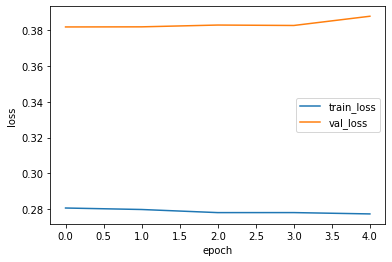

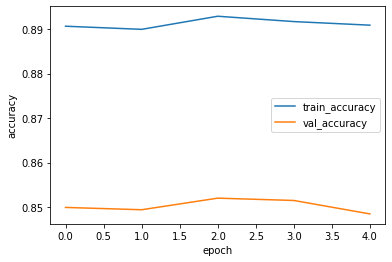

In [ ]:
import matplotlib.pyplot as plt                                                  #  에포크 5, 배치사이즈 5일 때의 loss, accuracy 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64032     
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 64,131
Trainable params: 64,131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 성능 평가

loss, accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print(accuracy)

0.8484532833099365


*RMSprop*

In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'softmax'))
model.add(Dense(3, activation = 'sigmoid'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])     # optimizer로 'RMSprop' 알고리즘 사용

In [ ]:
#  에포크 5, 배치사이즈 5

history = model.fit(x_train, y_train_encoded, batch_size = 5, epochs=5, validation_data = (x_test, y_test_encoded))

Epoch 1/5
7680/7680 [==============================] - 21s 3ms/step - loss: 0.4042 - accuracy: 0.8776 - val_loss: 0.5267 - val_accuracy: 0.8453
Epoch 2/5
7680/7680 [==============================] - 22s 3ms/step - loss: 0.4116 - accuracy: 0.8773 - val_loss: 0.5249 - val_accuracy: 0.8449
Epoch 3/5
7680/7680 [==============================] - 21s 3ms/step - loss: 0.3975 - accuracy: 0.8791 - val_loss: 0.5311 - val_accuracy: 0.8449
Epoch 4/5
7680/7680 [==============================] - 21s 3ms/step - loss: 0.4011 - accuracy: 0.8800 - val_loss: 0.5411 - val_accuracy: 0.8416
Epoch 5/5
7680/7680 [==============================] - 21s 3ms/step - loss: 0.4029 - accuracy: 0.8808 - val_loss: 0.5505 - val_accuracy: 0.8414


In [ ]:
#  에포크 10, 배치사이즈 5

history = model.fit(x_train, y_train_encoded, batch_size = 5, epochs=10, validation_data = (x_test, y_test_encoded))

Epoch 1/10
7680/7680 [==============================] - 24s 3ms/step - loss: 0.4073 - accuracy: 0.8802 - val_loss: 0.5659 - val_accuracy: 0.8398
Epoch 2/10
7680/7680 [==============================] - 21s 3ms/step - loss: 0.4176 - accuracy: 0.8780 - val_loss: 0.5769 - val_accuracy: 0.8387
Epoch 3/10
7680/7680 [==============================] - 26s 3ms/step - loss: 0.4187 - accuracy: 0.8785 - val_loss: 0.5718 - val_accuracy: 0.8401
Epoch 4/10
7680/7680 [==============================] - 21s 3ms/step - loss: 0.4107 - accuracy: 0.8795 - val_loss: 0.5633 - val_accuracy: 0.8390
Epoch 5/10
7680/7680 [==============================] - 31s 4ms/step - loss: 0.4038 - accuracy: 0.8806 - val_loss: 0.5654 - val_accuracy: 0.8400
Epoch 6/10
7680/7680 [==============================] - 22s 3ms/step - loss: 0.4039 - accuracy: 0.8809 - val_loss: 0.5660 - val_accuracy: 0.8402
Epoch 7/10
7680/7680 [==============================] - 22s 3ms/step - loss: 0.4016 - accuracy: 0.8813 - val_loss: 0.5725 - val_ac

In [ ]:
#  에포크 5, 배치사이즈 10

history = model.fit(x_train, y_train_encoded, batch_size = 10, epochs=5, validation_data = (x_test, y_test_encoded))

Epoch 1/5
3840/3840 [==============================] - 13s 3ms/step - loss: 0.5146 - accuracy: 0.8085 - val_loss: 0.4029 - val_accuracy: 0.8433
Epoch 2/5
3840/3840 [==============================] - 12s 3ms/step - loss: 0.3866 - accuracy: 0.8484 - val_loss: 0.3884 - val_accuracy: 0.8480
Epoch 3/5
3840/3840 [==============================] - 13s 3ms/step - loss: 0.3678 - accuracy: 0.8579 - val_loss: 0.3927 - val_accuracy: 0.8504
Epoch 4/5
3840/3840 [==============================] - 12s 3ms/step - loss: 0.3579 - accuracy: 0.8656 - val_loss: 0.3938 - val_accuracy: 0.8517
Epoch 5/5
3840/3840 [==============================] - 13s 3ms/step - loss: 0.3531 - accuracy: 0.8690 - val_loss: 0.3988 - val_accuracy: 0.8542


In [ ]:
#  에포크 10, 배치사이즈 10

history = model.fit(x_train, y_train_encoded, batch_size = 10, epochs=10, validation_data = (x_test, y_test_encoded))

Epoch 1/10
3840/3840 [==============================] - 10s 2ms/step - loss: 0.3927 - accuracy: 0.8835 - val_loss: 0.5712 - val_accuracy: 0.8376
Epoch 2/10
3840/3840 [==============================] - 9s 2ms/step - loss: 0.3798 - accuracy: 0.8842 - val_loss: 0.5684 - val_accuracy: 0.8382
Epoch 3/10
3840/3840 [==============================] - 9s 2ms/step - loss: 0.3769 - accuracy: 0.8855 - val_loss: 0.5723 - val_accuracy: 0.8377
Epoch 4/10
3840/3840 [==============================] - 9s 2ms/step - loss: 0.3747 - accuracy: 0.8859 - val_loss: 0.5705 - val_accuracy: 0.8365
Epoch 5/10
3840/3840 [==============================] - 9s 2ms/step - loss: 0.3729 - accuracy: 0.8871 - val_loss: 0.5791 - val_accuracy: 0.8354
Epoch 6/10
3840/3840 [==============================] - 9s 2ms/step - loss: 0.3709 - accuracy: 0.8883 - val_loss: 0.5838 - val_accuracy: 0.8357
Epoch 7/10
3840/3840 [==============================] - 9s 2ms/step - loss: 0.3692 - accuracy: 0.8891 - val_loss: 0.5901 - val_accuracy

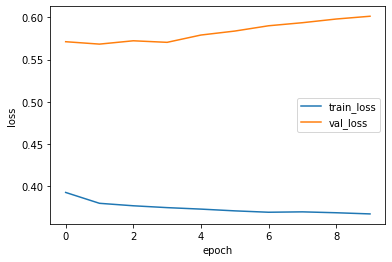

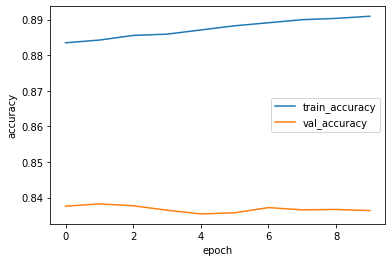

In [ ]:
plt.plot(history.history['loss'])                                                # 에포크 10, 배치사이즈 10일 때의 loss, accuracy 시각화
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                64032     
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 64,131
Trainable params: 64,131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 성능 평가

loss, accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print(accuracy)

0.8363711833953857


#### 6. 로지스틱 회귀분석

In [ ]:
#로지스틱 회귀분석 모델

from sklearn.linear_model import LogisticRegression 

tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.5)                # 인공신경망에 사용된 동일변수 존재 -> 변수 재정의
X_train_tfidf = tfidf.fit_transform(X_train)                                   
X_test_tfidf = tfidf.transform(X_test)                                          

LR_clf = LogisticRegression() 
LR_clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test))) 

#Train set score: 0.875
#Test set score: 0.825


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##평가

#나이브 베이즈, 로지스틱 회귀분석 모델 

In [ ]:
# 독립변수 나누기                       # 학습 데이터셋과 테스트 데이터셋의 비율 8:2로 나누기
train = content[:48001]
test = content[48001:]

# 종속변수 나누기
t = data['Y']
t_train = t[:48001]
t_test = t[48001:]

X_train = train   #학습 데이터셋 문서
y_train = t_train   #학습 데이터셋 라벨

X_test = test    #테스트 데이터셋 문서
y_test = t_test    #테스트 데이터셋 라벨


cv = CountVectorizer(max_features=1000000, min_df=5, max_df=0.5)

X_train_cv = cv.fit_transform(X_train) # train set을 변환
print('Train set dimension:', X_train_cv.shape) 
X_test_cv = cv.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_cv.shape)

Train set dimension: (48001, 14434)
Test set dimension: (11999, 14434)


In [ ]:
tfidf = TfidfVectorizer(max_features=1000000, min_df=5, max_df=0.5) 
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

In [ ]:
NB_clf = MultinomialNB()

NB_clf.fit(X_train_cv, y_train)

NB_clf

MultinomialNB()

In [ ]:
LR_clf = LogisticRegression()

LR_clf.fit(X_train_tfidf, y_train) 

LR_clf

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
models = [                                                                       
    NB_clf,
    LR_clf,
]

In [ ]:
best_model_accuracy = 0
best_model = None

for model in models:
    
    model_name = model.__class__.__name__
    
    predY = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, predY)
    
    print("-" * 43)
    print(model_name + ": " )
    
    if(accuracy > best_model_accuracy):
        best_model_accuracy = accuracy
        best_model = model_name
    
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, predY))
    print("Accuracy: {:.2%}".format(accuracy))

-------------------------------------------
MultinomialNB: 
Confusion Matrix: 
[[3881  312 1316]
 [ 401 3707  578]
 [ 188    6 1610]]
Accuracy: 76.66%
-------------------------------------------
LogisticRegression: 
Confusion Matrix: 
[[3920  523 1066]
 [ 133 4366  187]
 [ 164   24 1616]]
Accuracy: 82.52%


In [ ]:
print("Best Model : {}".format(best_model))
print("Best Model Accuracy : {:.2%}".format(best_model_accuracy))

Best Model : LogisticRegression
Best Model Accuracy : 82.52%


# 의사결정나무, knn, svm 모델평가를 위한 변수 재정의

In [ ]:
df = data
train = df['content']
test = df['Y']
vectorizer = TfidfVectorizer()
train_Tfid = vectorizer.fit_transform(train)
x_train,x_test,y_train,y_test = train_test_split(train_Tfid, test, test_size=0.2, random_state=1, stratify=test)

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=9)

dt_model = dt_model.fit(x_train, y_train)

dt_model


DecisionTreeClassifier(max_depth=9)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, p=2)

knn_model = knn.fit(x_train, y_train)

knn_model

KNeighborsClassifier(n_neighbors=7)

In [ ]:
svm_model = SVC(kernel='linear', C=1, random_state=0)

svm_model.fit(x_train, y_train)

svm_model

SVC(C=1, kernel='linear', random_state=0)

In [ ]:
models = [                                                                       # Accuracy >= 0.5인 모델들의 평가 지표
    dt_model,
    knn_model,
    svm_model,
]

In [ ]:
best_model_accuracy = 0
best_model = None

for model in models:
    
    model_name = model.__class__.__name__
    
    predY = model.predict(x_test)
    accuracy = accuracy_score(y_test, predY)
    
    print("-" * 43)
    print(model_name + ": " )
    
    if(accuracy > best_model_accuracy):
        best_model_accuracy = accuracy
        best_model = model_name
    
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, predY))
    print("Accuracy: {:.2%}".format(accuracy))

-------------------------------------------
DecisionTreeClassifier: 
Confusion Matrix: 
[[1601 1466  933]
 [  39 3943   18]
 [ 456 1174 2370]]
Accuracy: 65.95%
-------------------------------------------
KNeighborsClassifier: 
Confusion Matrix: 
[[3078  436  486]
 [1541 2070  389]
 [1238  215 2547]]
Accuracy: 64.12%
-------------------------------------------
SVC: 
Confusion Matrix: 
[[2936  618  446]
 [ 376 3488  136]
 [ 528  169 3303]]
Accuracy: 81.06%


In [ ]:
print("Best Model : {}".format(best_model))
print("Best Model Accuracy : {:.2%}".format(best_model_accuracy))

Best Model : SVC
Best Model Accuracy : 81.06%
